In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
main_df_train = pd.read_csv("Data/RussianCurve.csv")

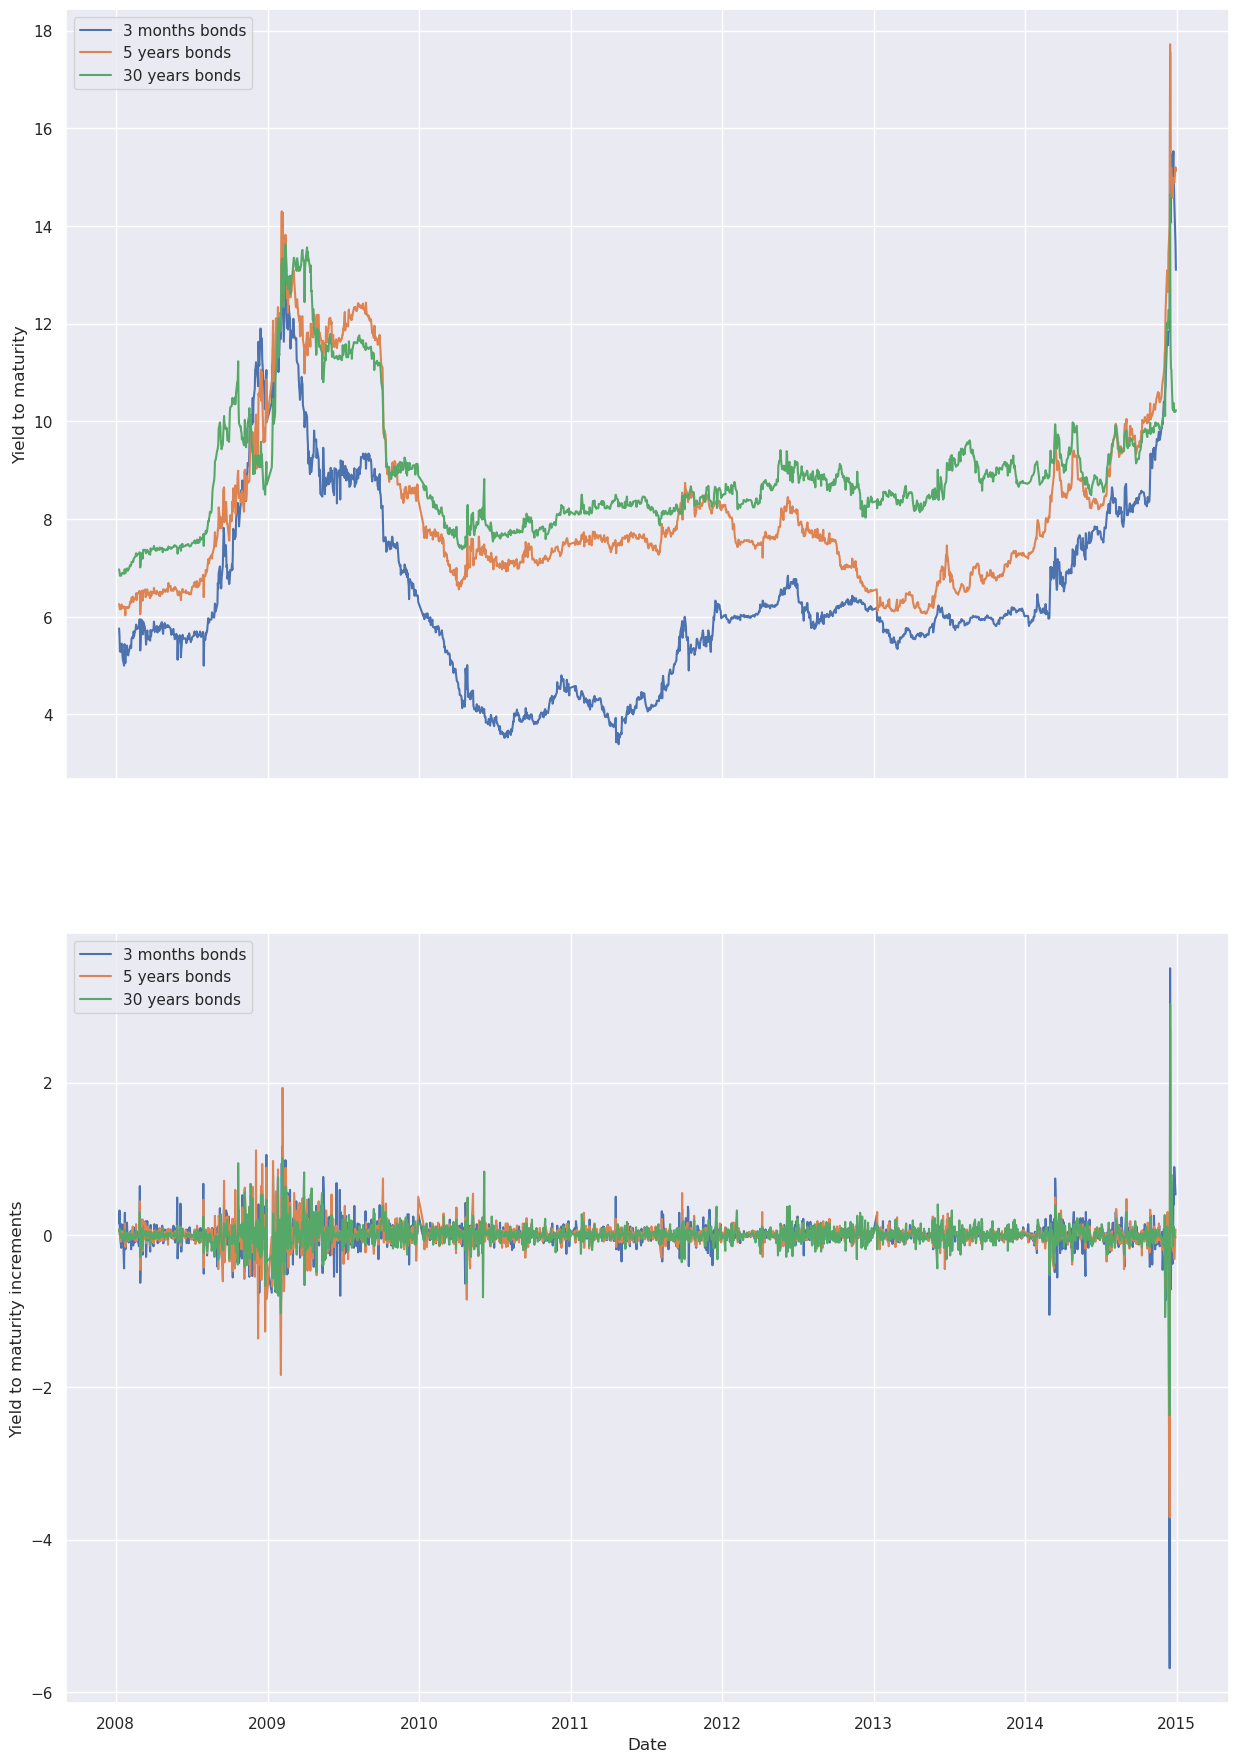

In [50]:
sns.set(rc={"figure.figsize":(15, 22)})
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(pd.to_datetime(main_df_train["date"]), main_df_train["0.5"], label="3 months bonds")
axs[0].plot(pd.to_datetime(main_df_train["date"]), main_df_train["5.0"], label="5 years bonds")
axs[0].plot(pd.to_datetime(main_df_train["date"]), main_df_train["30.0"], label="30 years bonds")
axs[0].legend()
axs[0].set_ylabel("Yield to maturity")

axs[1].plot(pd.to_datetime(main_df_train["date"]), main_df_train["0.5"].diff(), label="3 months bonds")
axs[1].plot(pd.to_datetime(main_df_train["date"]), main_df_train["5.0"].diff(), label="5 years bonds")
axs[1].plot(pd.to_datetime(main_df_train["date"]), main_df_train["30.0"].diff(), label="30 years bonds")
axs[1].legend()
axs[1].set_ylabel("Yield to maturity increments")

plt.xlabel("Date")
plt.savefig("YTM.pdf")

In [8]:
coefs = pd.read_csv("Data/coefsDrops.csv")
ycurve = pd.read_csv("Data/FedYeildCurve1DayMonth.csv")

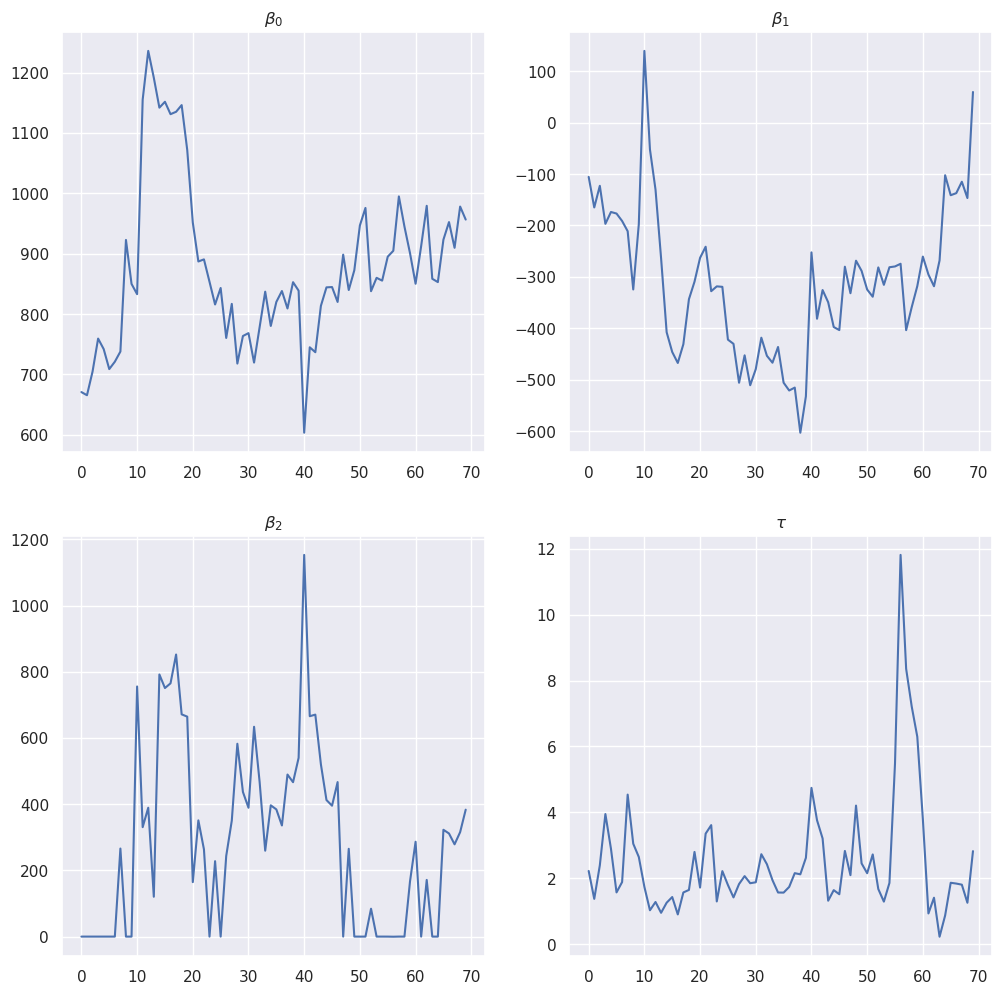

In [29]:
sns.set(rc={"figure.figsize":(12, 12)})
fig, axs = plt.subplots(2,2)

axs[0,0].plot(coefs["beta0"], label=r"$\beta_0$")
axs[0,0].set_title(r"$\beta_0$")
axs[0,1].plot(coefs["beta1"], label=r"$\beta_1$")
axs[0,1].set_title(r"$\beta_1$")
axs[1,0].plot(coefs["beta2"], label=r"$\beta_2$")
axs[1,0].set_title(r"$\beta_2$")
axs[1,1].plot(coefs["tau"], label=r"$\tau$")
axs[1,1].set_title(r"$\tau$")
plt.savefig("factors.pdf")
plt.show()

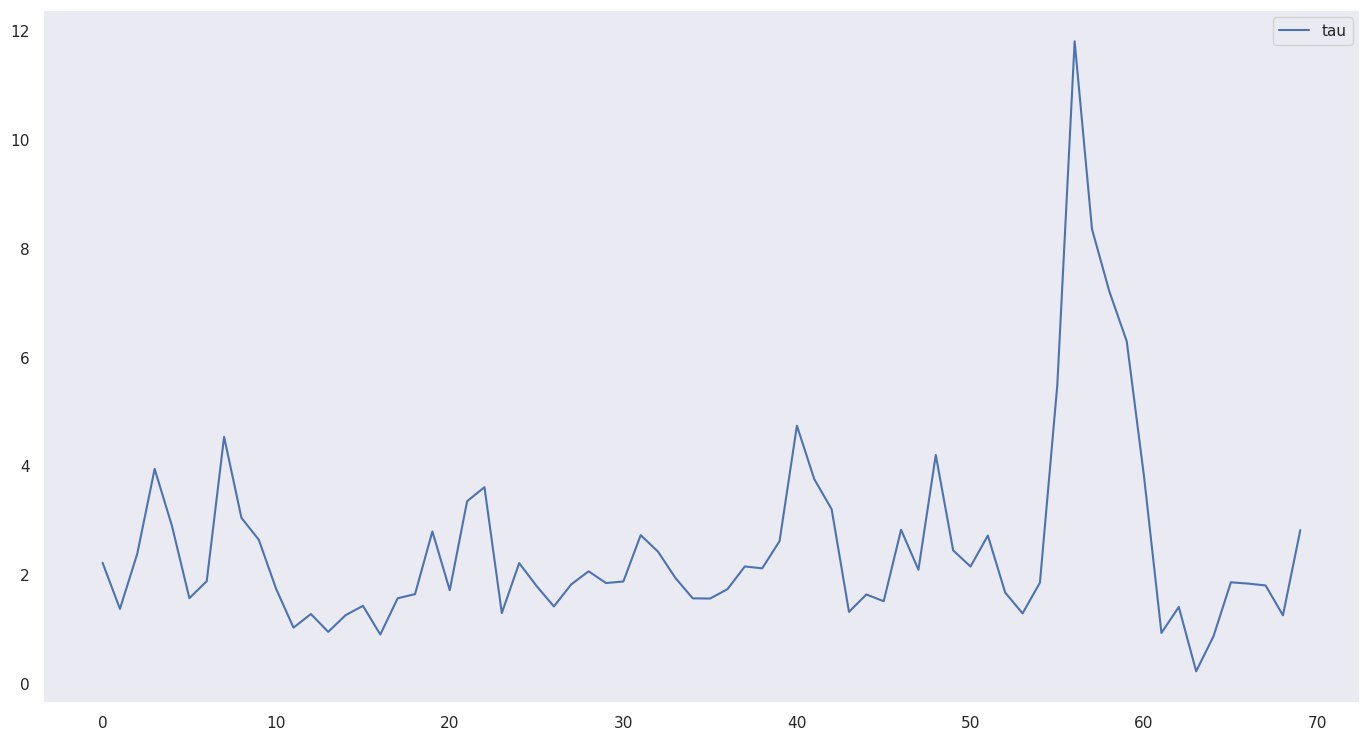

<Figure size 1700x900 with 0 Axes>

In [16]:
sns.set(rc={"figure.figsize":(17, 9)})
plt.plot(coefs["tau"], label=r"$\tau$")
plt.legend()
plt.grid()
plt.savefig("factors.pdf")

In [53]:
def plotZCY(beta0, beta1, beta2, tau):
    def Pr(time):
        return (beta0 + (beta1 + beta2) * (tau / time) * (1 - np.exp(- time / tau)) - beta2 * np.exp(- time / tau))/100
    
    return Pr

In [ ]:
def plotZCY(beta0, beta1, beta2, tau, message):
    def Pr(time):
        return (beta0 + (beta1 + beta2) * (tau / time) * (1 - np.exp(- time / tau)) - beta2 * np.exp(- time / tau))/100
    
    sns.set(rc={"figure.figsize":(17, 9)})
    t = np.array([0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 7, 10])
    plt.plot(t, Pr(t), label=message)
    plt.legend

In [57]:
coefs

,Unnamed: 0,beta0,beta1,beta2,tau
0,0,670.812416,-105.629480,0.000338,2.222611
1,1,665.575848,-165.005828,0.000207,1.375205
2,2,704.732311,-122.959653,-0.000255,2.391770
3,3,759.394361,-196.817660,-0.008632,3.949547
4,4,741.993160,-173.800910,0.009595,2.897311
...,...,...,...,...,...
65,79,923.260576,-141.245444,322.633752,1.864032
66,80,952.297701,-137.225681,311.457659,1.840137
67,81,909.671238,-115.095678,278.715441,1.806218
68,82,978.004369,-146.734398,315.542921,1.257233


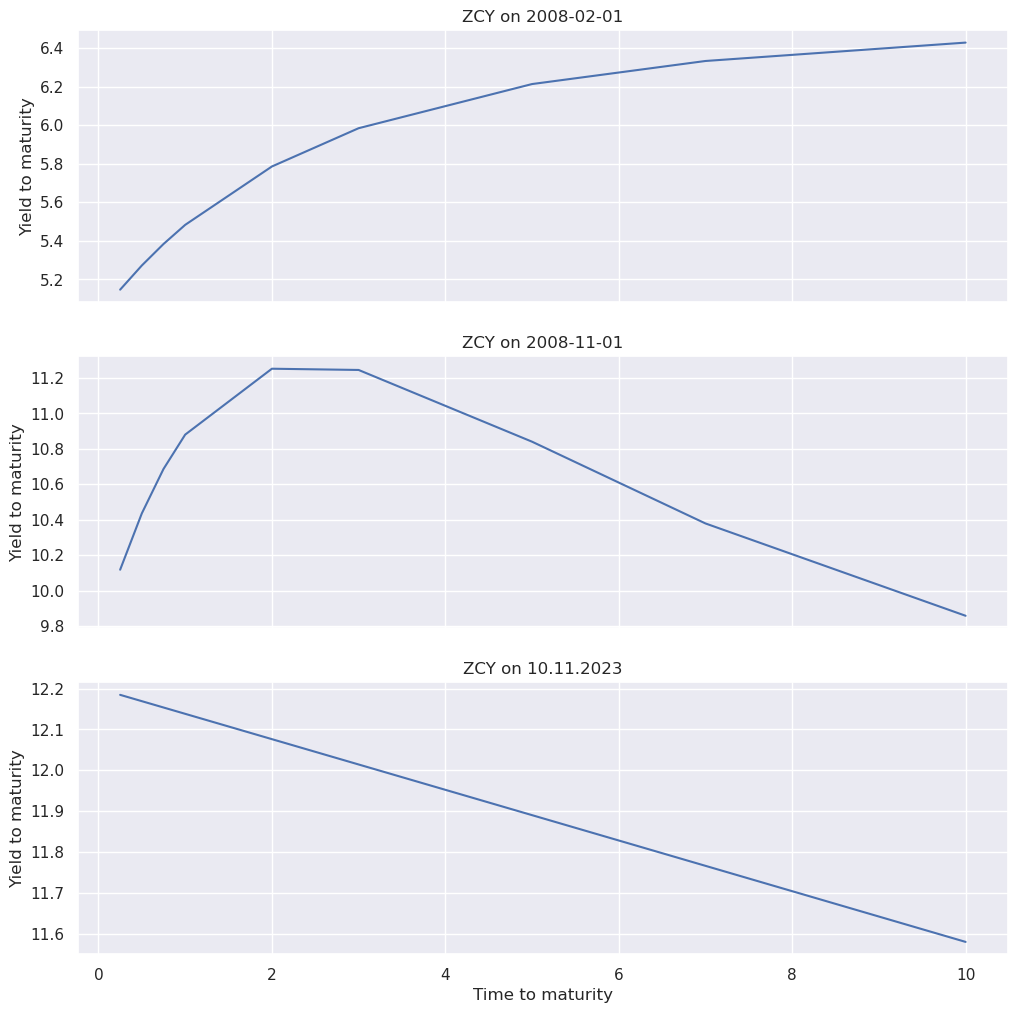

In [121]:
sns.set(rc={"figure.figsize":(12, 12)})

times = np.array([0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0])

i1 = 1
i2 = 10

fig, axs = plt.subplots(3,1, sharex=True)

p1=plotZCY(coefs["beta0"][i1], coefs["beta1"][i1], coefs["beta2"][i1], coefs["tau"][i1])
axs[0].plot(times, p1(times), label="ZCY in 2008-02-01")
axs[0].set_ylabel("Yield to maturity")
axs[0].set_title("ZCY on 2008-02-01")

p1=plotZCY(coefs["beta0"][i2], coefs["beta1"][i2], coefs["beta2"][i2], coefs["tau"][i2])
axs[1].plot(times, p1(times), label="ZCY in 2008-11-01")
axs[1].set_ylabel("Yield to maturity")
axs[1].set_title("ZCY on 2008-11-01")


p1=plotZCY(3.367e+04, -3.245e+04,  3.324e+04, -5.311e+03)
axs[2].plot(times, p1(times), label="ZCY in 10.11.2023")
axs[2].set_ylabel("Yield to maturity")
axs[2].set_title("ZCY on 10.11.2023")

plt.xlabel("Time to maturity")
plt.savefig("ZCY.pdf")
plt.show()

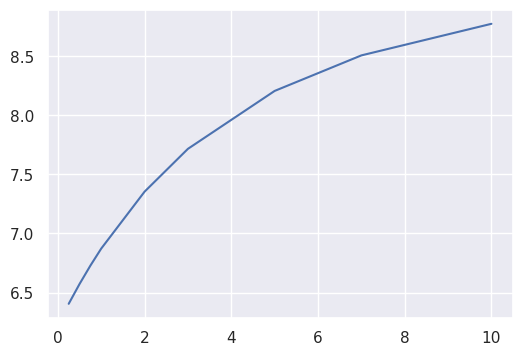

In [112]:
sns.set(rc={"figure.figsize":(6, 4)})
i3=50
p1=plotZCY(coefs["beta0"][i3], coefs["beta1"][i3], coefs["beta2"][i3], coefs["tau"][i3])
plt.plot(times, p1(times), label=r"ZCY in 3")